<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
!rm -r /content/RoadCrack-2

In [ ]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:02<00:00, 286.70it/s]


In [ ]:
!pip install opencv-python

In [ ]:
!pip install pillow

# Cut Image based on bounding box

In [ ]:
!mkdir /content/cropped/
!mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

mkdir: cannot create directory ‘/content/cropped/tidak-retak’: File exists


In [ ]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [ ]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [ ]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

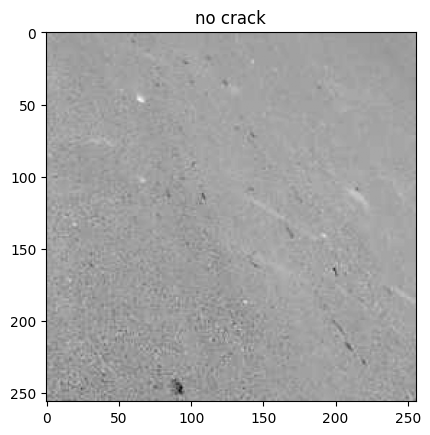

In [ ]:
example = "/content/cropped/tidak-retak/cropped_IMG_20251123_160924_3_jpg.rf.bb5b566121c9b45df04b85f27e7ba141.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'no crack')
plt.show()

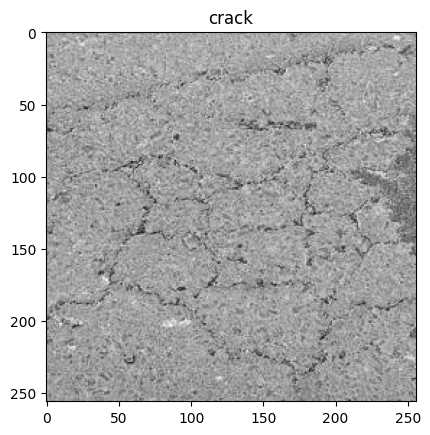

In [ ]:
example = "/content/cropped/retak/cropped_IMG_20251106_150643_jpg.rf.c06a0746cde2bb34bbfe60f76420f6b7.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

# Init GLCM Function

In [124]:
def glcm_process(img, path="/content/cropped/"):
    im_frame = Image.open(f"{path}{img}")
    if im_frame.mode == "RGBA":
        im_frame = im_frame.convert("RGB")
    im_frame = im_frame.resize((64*2, 64*2))
    image = (256 * rgb2gray(np.array(im_frame))).astype(np.uint8)
    image = util.img_as_ubyte(image)
    # GLCM
    distances = [50]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation


# Crafting Dataframe

In [125]:
import pandas as pd

df_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])
df_no_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])

In [126]:
df_crack,df_no_crack

(Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [],
 Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [])

In [127]:
cropped_dir = os.listdir("/content/cropped/retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_crack = pd.concat([df_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [128]:
cropped_dir = os.listdir("/content/cropped/tidak-retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/tidak-retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_no_crack = pd.concat([df_no_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [129]:
df_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,720.988482,20.661959,0.051822,0.018935,-0.023032
1,384.505108,14.026142,0.081480,0.028776,0.017883
2,255.851963,11.914864,0.086990,0.029294,0.075203
3,283.215244,11.668169,0.100398,0.032792,0.051150
4,540.019631,17.339543,0.066876,0.022840,0.029917
...,...,...,...,...,...
180,653.065605,19.927384,0.053425,0.019383,-0.055564
181,631.215745,19.501402,0.054095,0.018595,0.054950
182,2012.314704,33.795272,0.038320,0.013372,0.100553
183,476.304988,16.066406,0.070068,0.024574,-0.035259


In [ ]:
df_no_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,145.856871,9.257111,0.107943,0.034350,0.204103
1,155.859976,9.563902,0.102659,0.035646,0.042432
2,61.978766,6.095353,0.156846,0.057229,-0.020835
3,311.996094,13.479067,0.079266,0.026242,0.008573
4,168.400641,10.085136,0.098812,0.033765,0.177283
...,...,...,...,...,...
148,144.348257,9.398137,0.101734,0.036396,0.070894
149,273.849259,12.411959,0.089090,0.030222,-0.017304
150,80.981671,7.150341,0.122332,0.046832,0.034897
151,173.457232,10.333634,0.092059,0.031370,0.068555


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [130]:
import pandas as pd

df_crack['label'] = 1
df_no_crack['label'] = 0

df = pd.concat([df_crack, df_no_crack], ignore_index=True)
df

,contrast,dissimiliarity,homogeneity,energy,correlation,label
0,720.988482,20.661959,0.051822,0.018935,-0.023032,1
1,384.505108,14.026142,0.081480,0.028776,0.017883,1
2,255.851963,11.914864,0.086990,0.029294,0.075203,1
3,283.215244,11.668169,0.100398,0.032792,0.051150,1
4,540.019631,17.339543,0.066876,0.022840,0.029917,1
...,...,...,...,...,...,...
333,124.057192,8.633113,0.116580,0.036177,0.222622,0
334,258.938502,12.023838,0.087492,0.030491,0.013031,0
335,54.195713,5.598758,0.173215,0.048192,0.388407,0
336,222.359675,11.862881,0.079796,0.030523,-0.134268,0


In [131]:
X = df[['contrast','dissimiliarity','homogeneity','energy','correlation']]
y = df['label']

X,y

(       contrast  dissimiliarity  homogeneity    energy  correlation
 0    720.988482       20.661959     0.051822  0.018935    -0.023032
 1    384.505108       14.026142     0.081480  0.028776     0.017883
 2    255.851963       11.914864     0.086990  0.029294     0.075203
 3    283.215244       11.668169     0.100398  0.032792     0.051150
 4    540.019631       17.339543     0.066876  0.022840     0.029917
 ..          ...             ...          ...       ...          ...
 333  124.057192        8.633113     0.116580  0.036177     0.222622
 334  258.938502       12.023838     0.087492  0.030491     0.013031
 335   54.195713        5.598758     0.173215  0.048192     0.388407
 336  222.359675       11.862881     0.079796  0.030523    -0.134268
 337   35.718049        4.657752     0.189709  0.063755     0.235561
 
 [338 rows x 5 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 333    0
 334    0
 335    0
 336    0
 337    0
 Name: label, Length: 338, dtype: i

In [147]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

X_scaled = decimal_scaling(X)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [134]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5795 - loss: 0.7588 - val_accuracy: 0.5741 - val_loss: 0.6575
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5318 - loss: 0.6857 - val_accuracy: 0.5741 - val_loss: 0.6295
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 0.6498 - val_accuracy: 0.5556 - val_loss: 0.6142
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5624 - loss: 0.6082 - val_accuracy: 0.5556 - val_loss: 0.5959
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 0.6238 - val_accuracy: 0.7407 - val_loss: 0.5817
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6405 - loss: 0.5993 - val_accuracy: 0.7778 - val_loss: 0.5672
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - loss: 0.5894 - val_accuracy: 0.7963 - val_loss: 0.5558
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7572 - loss: 0.5939 - val_accuracy: 0.7963 - val_loss:

In [155]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7989 - loss: 0.5279 
Accuracy: 0.8088235259056091


# Testing

Saving tidak_retak.png to tidak_retak (1).png


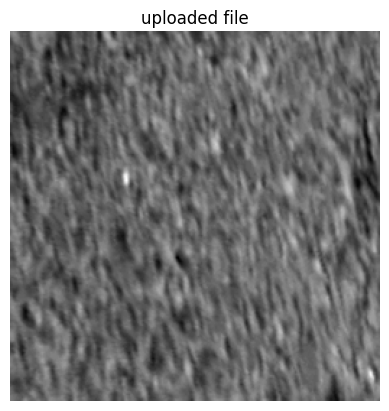

In [156]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from skimage import util
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

#cv rgb ke bgr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# preprocess
im_frame = Image.fromarray(img_rgb).resize((64*4, 64*4))
image = (255 * rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)
plt.imshow(imaged, cmap='gray')
plt.title('uploaded file')
plt.axis('off')
plt.show()

'retak (1).jpg'

In [158]:
sample = glcm_process(filename,path='/content/')
# sample = np.array(sample).reshape(1,5)
# sample
sample

(array([[78.41756811, 78.58908544, 75.94391026, 71.66643543]]),
 array([[7.02554087, 6.96462019, 6.82652244, 6.64365823]]),
 array([[0.13534492, 0.13432183, 0.14090114, 0.14285007]]),
 array([[0.04712149, 0.04676466, 0.04670669, 0.04912258]]),
 array([[-0.00405592,  0.03163995,  0.05332613,  0.01896974]]))

In [142]:
import numpy as np

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Prediksi crack:", pred[0][0])


X does not have valid feature names, but StandardScaler was fitted with feature names


ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
